In [1]:
from dynairxvis import plot
from datetime import datetime

In [2]:
categories = ['Nominal 1', 'Nominal 2', 'Nominal 2', 'Nominal 3']
tasks = [
    (datetime(2015, 1, 1), datetime.now()),  # Task 1
    (datetime(2017, 1, 1), datetime(2019, 6, 1)),  # Task 2
    (datetime(2021, 7, 1), datetime.now()), # Continuation of Task 2 (after a gap)
    (datetime(2023, 1, 1), datetime.now()),  # Task 3
]
start_col, end_col = zip(*tasks)


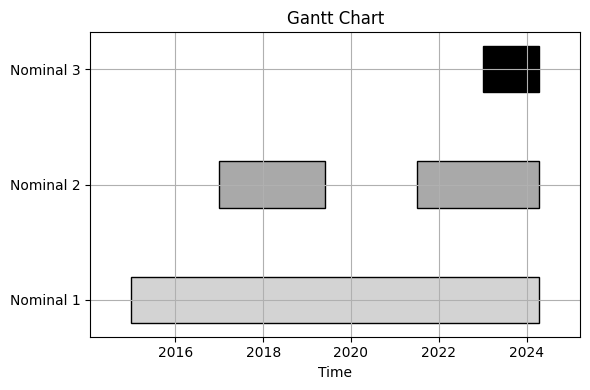

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart'}, xlabel='Time'>)

In [3]:
plot.gantt(categories,start_col, end_col)

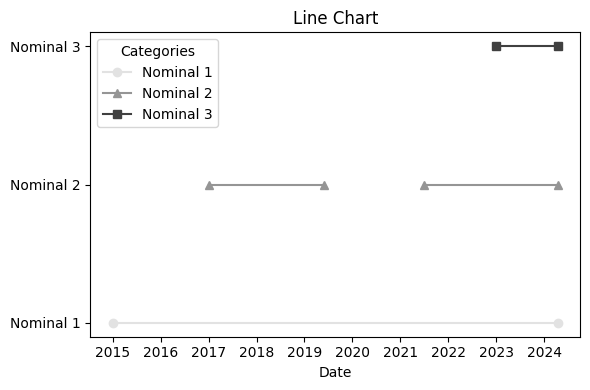

In [4]:
from dynairxvis.time import line
line(categories, start_col, end_col)

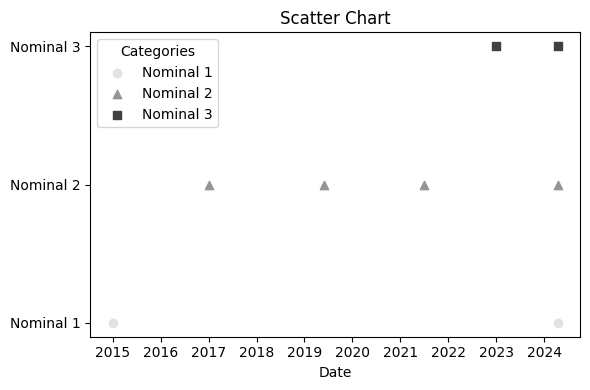

In [5]:
plot.scatter(categories, start_col, end_col)

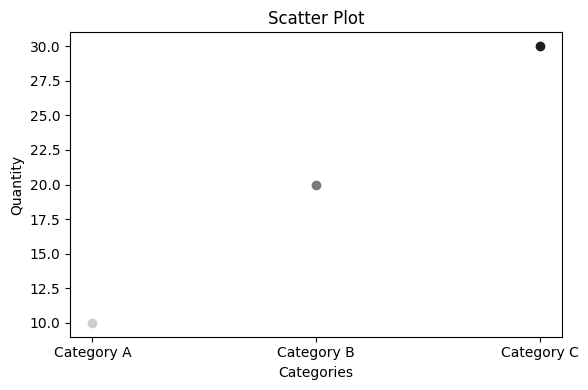

In [7]:
categories = ['Category A', 'Category B', 'Category C']
values = [10, 20, 30] # For 'scatter' mode

plot.scatter(categories, values=values, mode='scatter')

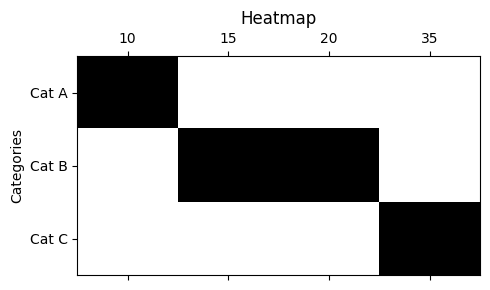

In [6]:
categories = ['Cat A', 'Cat B', 'Cat C']
values = [10, [15, 20], 35]
from dynairxvis.plot import heatmap
heatmap(categories, values)